In [1]:
import quanguru as qg

# QuanGuru uses sparse matrices by default, 
# but sparse matrices are not easily readable when we print them
# so, in below examples, we use .A to print them as arrays

# 1 - Initial state for a Qubit

This tutorial shows various ways to set the initial state of a qubit.

We start by creating a qubit

In [2]:
qub = qg.Qubit()

Before diving into the examples, let's first define certain conventions and notations representing the eigenvectors of $\sigma_{z}$ operator.

Matrix form of $\sigma_{z}$ operator is:

$\sigma_{z} = \left[\begin{array}{ll}1 & 0 \\ 0 & -1\end{array}\right]$

and its eigenvectors (with the corresponding eigenvalues) are

$|0\rangle = \left[\begin{array}{ll} 1 \\ 0 \end{array}\right] \text{ (with eigenvalue 1)}$


$|1\rangle = \left[\begin{array}{ll} 0 \\ 1 \end{array}\right] \text{ (with eigenvalue -1)}$

The labels, 0 and 1, of the ket states here represent the position of the 1 in the column matrices. In other words, the $|0\rangle$ has 1 at row 0, and the $|1\rangle$ has 1 at row 1. This convention extends naturally and is used for higher dimensional systems such as larger spins or harmonic oscillators.
We will refer these as `basis` states, and the `basis` method of `QuantumToolbox` can be used for the creation of such states, but, we here focus on creating the initial states through the `Qubit` object.

## 1. Pure States

### 1.1 If Initial state is a basis state

In order to set $|0\rangle$ or $|1\rangle$, we simply give the respective number as input for the `initialState`

In [3]:
qub.initialState = 0
print(qub.initialState.A)

qub.initialState = 1
print(qub.initialState.A)


[[1.]
 [0.]]
[[0.]
 [1.]]


### 1.2 If Initial state is a superposition state

If we want to set some super-position of $|0\rangle$ and $|1\rangle$ as the initial state, we can do this in various different ways depending on the superposition state we want to set.

#### 1.2.1 If Initial state is an equal superposition state
The first method is for the equal superposition state

$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle )$

In this special case, we simply give a list $[1, 0]$ (or $[0, 1]$ the order is not important) of the states, and it is used to create the equal superposition. Note that "equal superposition" here does not mean equal superposition of every basis states, it just means equal superposition of the given input basis states. In other words, for higher dimensional systems, you can create an equal superposition of any number of basis states. For example for a 5 dimensional system, $[1, 0, 3]$ will create equal superposition of these three basis states.

In [4]:
qub.initialState = [1, 0]
print(qub.initialState.A)

[[0.70710678]
 [0.70710678]]


#### 1.2.2 If Initial state is an arbitrary superposition state

The second method for creating a superposition state is by using a dictionary, where `key:value` pairs represent the `basis-state:population/coefficient`.

`population/coefficient` here means that there are also two different ways for this approach.

Consider the following superposition state

$c_{0}|0\rangle + c_{1}|1\rangle$

where $c_{i}$ are the complex probability amplitudes, and $p_{i} = |c_{i}|^{2}$ are the population, satisfying the normalization condition $\sum_{i}p_{i} = 1$.

Now, we can create our superposition state either by using the `population` or `coefficient`.

##### 1.2.2.1 Initial state using the populations

Let's cover the `population` first, which is the default method. Below is an example where we want $p_{0} = 0.2$ and $p_{1} = 0.8$. Note that the order of the `key:value` pairs does not matter, meaning `{0:0.2, 1:0.8}` is the same as `{1:0.8, 0:0.2}`.

In [5]:
qub.initialState = {0:0.2, 1:0.8}
print(qub.initialState.A)

# let's also convert this initial state into density matrix to confirm:
# (i) the populations and (ii) its purity
denMat = qg.densityMatrix(qub.initialState)
print(denMat.A, qg.purity(denMat), sep='\n')

[[0.4472136 ]
 [0.89442719]]
[[0.2 0.4]
 [0.4 0.8]]
1.0000000000000009


Also note that the populations can be *relative*, meaning the input does not have to sum to 1, and they will be normalized to sum to one. For example, if we input ${0:0.2, 1:0.9}$, the total population is $1.1$. Therefore, it will be normalized to ${0:(0.2/1.1), 1:(0.9/1.1)}$.

In [6]:
qub.initialState = {0:0.2, 1:0.9}
print(qub.initialState.A)

denMat = qg.densityMatrix(qub.initialState)
print(denMat.A, qg.purity(denMat), 0.9/1.1, 0.2/1.1, sep='\n')

[[0.42640143]
 [0.90453403]]
[[0.18181818 0.38569461]
 [0.38569461 0.81818182]]
1.0000000000000007
0.8181818181818181
0.18181818181818182


##### 1.2.2.2 If the relative phases are important

Obviously, the `population` approach ignores the relative phase between the `coefficients`, which might be important for us.
In such a case, we can give the `key:value` value pairs as `state:coefficient`, but we also need to set `_inpCoef` to `True` as below, where we compare the `population` and `coefficient` approach.
Notice that both cases below creates $p_{0} = 0.66$ and $p_{1} = 0.33$, but the first one uses the complex probability amplitudes introducing a relative phase, which is observed as the complex parts of the off-diagonal elements of the density matrix. 

In [7]:
qub._inpCoef = True
qub.initialState = {0:0.2*(1+1j), 1:0.2}
print(qub.initialState.A)
denMat = qg.densityMatrix(qub.initialState)
print(denMat.A, qg.purity(denMat), sep='\n')

qub._inpCoef = False
qub.initialState = {0:0.66, 1:0.33}
print(qub.initialState.A)
denMat = qg.densityMatrix(qub.initialState)
print(denMat.A, qg.purity(denMat), sep='\n')

[[0.57735027+0.57735027j]
 [0.57735027+0.j        ]]
[[0.66666667+0.j         0.33333333+0.33333333j]
 [0.33333333-0.33333333j 0.33333333+0.j        ]]
(0.9999999999999989+0j)
[[0.81649658]
 [0.57735027]]
[[0.66666667 0.47140452]
 [0.47140452 0.33333333]]
1.0


## Mixed states or any other arbitrary state

`initialState` also accepts a (ket or density) matrix as input, which makes it possible to set any state we want as the initial state.
For example, if we want the initial state to be a mixed state, we can create it using the `densityMatrix` function of `QuantumToolbox` then set it through again the `initialState` as below, where we also calculate the purity of each mixed state.


In [8]:
mixedState = qg.densityMatrix([qg.basis(2,1), qg.basis(2,0)], [0.5, 0.5])
qub.initialState = mixedState
print(qub.initialState.A, qg.purity(qub.initialState), sep='\n')

mixedState = qg.densityMatrix([qg.basis(2,1), qg.basis(2,0)], [0.25, 0.75])
qub.initialState = mixedState
print(qub.initialState.A, qg.purity(qub.initialState), sep='\n')

[[0.5 0. ]
 [0.  0.5]]
0.5
[[0.75 0.  ]
 [0.   0.25]]
0.625


Note that all the other methods covered above can also be achieved similarly by using the `superPos` function of `QuantumToolbox` as below. 

In [9]:
# basis state
ket1 = qg.superPos(2, 1)
qub.initialState = ket1
print(qub.initialState.A)
denMat = qg.densityMatrix(qub.initialState)
print(denMat.A, qg.purity(denMat), sep='\n')

# equal superposition
ket0 = qg.superPos(2, [1, 0])
qub.initialState = ket0
print(qub.initialState.A)
denMat = qg.densityMatrix(qub.initialState)
print(denMat.A, qg.purity(denMat), sep='\n')

# arbitrary superposition with populations
ket0 = qg.superPos(2, {0:0.33, 1:0.66})
qub.initialState = ket0
print(qub.initialState.A)
denMat = qg.densityMatrix(qub.initialState)
print(denMat.A, qg.purity(denMat), sep='\n')

# arbitrary superposition with complex probability amplitudes
ket0 = qg.superPos(2, {0:0.2*(1+1j), 1:0.2}, populations=False)
qub.initialState = ket0
print(qub.initialState.A)
denMat = qg.densityMatrix(qub.initialState)
print(denMat.A, qg.purity(denMat), sep='\n')

[[0.]
 [1.]]
[[0. 0.]
 [0. 1.]]
1.0
[[0.70710678]
 [0.70710678]]
[[0.5 0.5]
 [0.5 0.5]]
0.9999999999999996
[[0.57735027]
 [0.81649658]]
[[0.33333333 0.47140452]
 [0.47140452 0.66666667]]
1.0
[[0.57735027+0.57735027j]
 [0.57735027+0.j        ]]
[[0.66666667+0.j         0.33333333+0.33333333j]
 [0.33333333-0.33333333j 0.33333333+0.j        ]]
(0.9999999999999989+0j)


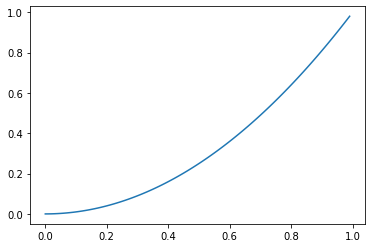

In [10]:
import matplotlib.pyplot as plt
plt.plot([i/100 for i in range(100)], [(i/100)**2 for i in range(100)])